In [48]:
from Trader import Trader
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [49]:
import sys
sys.path.append("..")
import stocksOps as so

In [50]:
data = so.downloadIntradayData("NVDA")

[*********************100%***********************]  1 of 1 completed


In [51]:
data.head()
data.shape

(2728, 6)

In [52]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-07 09:30:00-05:00,157.720001,158.850006,156.669998,158.289993,158.289993,1029307
2022-12-07 09:31:00-05:00,158.416702,158.759995,158.059998,158.716507,158.716507,99161
2022-12-07 09:32:00-05:00,158.720001,158.750000,157.820007,157.860001,157.860001,111370
2022-12-07 09:33:00-05:00,157.854996,158.899994,157.854996,158.824005,158.824005,132409
2022-12-07 09:34:00-05:00,158.899994,159.679993,158.779999,159.630096,159.630096,253912


In [53]:
so.anotherNormalizerDataset(data)

In [54]:
data = so.calculateAll(data)

In [55]:

data

,Open,High,Low,Close,Adj Close,Volume,returns,SMA,EMA,WMA,ATR,ATR_WMA,ATR_EMA,Momentum,ROC
Datetime,,,,,,,,,,,,,,,
2022-12-07 09:30:00-05:00,-2.062118,-1.916240,-2.199604,-1.980917,-1.980917,7.971259,0.032711,0.000000,0.000000,0.000000,0.000000,0.000000,0.283364,0.000000,0.000000
2022-12-07 09:31:00-05:00,-1.959744,-1.929430,-1.994494,-1.918171,-1.918171,-0.160355,-0.061640,0.000000,0.000000,0.000000,0.000000,0.000000,0.228789,0.000000,0.000000
2022-12-07 09:32:00-05:00,-1.915177,-1.930895,-2.029907,-2.044174,-2.044174,-0.053620,0.074548,0.000000,0.000000,0.000000,0.000000,0.000000,0.199526,0.000000,0.000000
2022-12-07 09:33:00-05:00,-2.042282,-1.908914,-2.024744,-1.902357,-1.902357,0.130309,0.066480,0.000000,0.000000,0.000000,0.000000,0.000000,0.183459,0.000000,0.000000
2022-12-07 09:34:00-05:00,-1.888728,-1.794612,-1.888250,-1.783771,-1.783771,1.192525,0.040317,0.000000,0.000000,0.000000,0.000000,0.000000,0.164531,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-15 15:56:00-05:00,-0.335554,-0.333587,-0.326314,-0.320017,-0.320017,0.531607,0.009281,-0.305187,-0.310382,-0.308654,0.020982,0.021103,0.020518,-0.004252,1.346430
2022-12-15 15:57:00-05:00,-0.317922,-0.317467,-0.304920,-0.317075,-0.317075,0.596807,-0.018224,-0.307919,-0.312055,-0.311625,0.020307,0.019801,0.019163,0.027952,-8.101323
2022-12-15 15:58:00-05:00,-0.315424,-0.331784,-0.310718,-0.322960,-0.322960,1.304033,0.018563,-0.311282,-0.314781,-0.315386,0.019139,0.020282,0.019639,-0.012770,4.116966


In [56]:
#so.normalizeDataset(data)

In [57]:
# get max of atr's and  roc's
atr_np = data["ATR"].to_numpy()
max(atr_np)
atr_wma_np = data["ATR_WMA"].to_numpy()
min(atr_wma_np)

0.0

In [58]:
roc_np = data["ROC"].to_numpy()
max(roc_np[6:100])

372.65274059735344

In [59]:
mom_np = data["Momentum"].to_numpy()
min(mom_np)

-1.2254457222910686

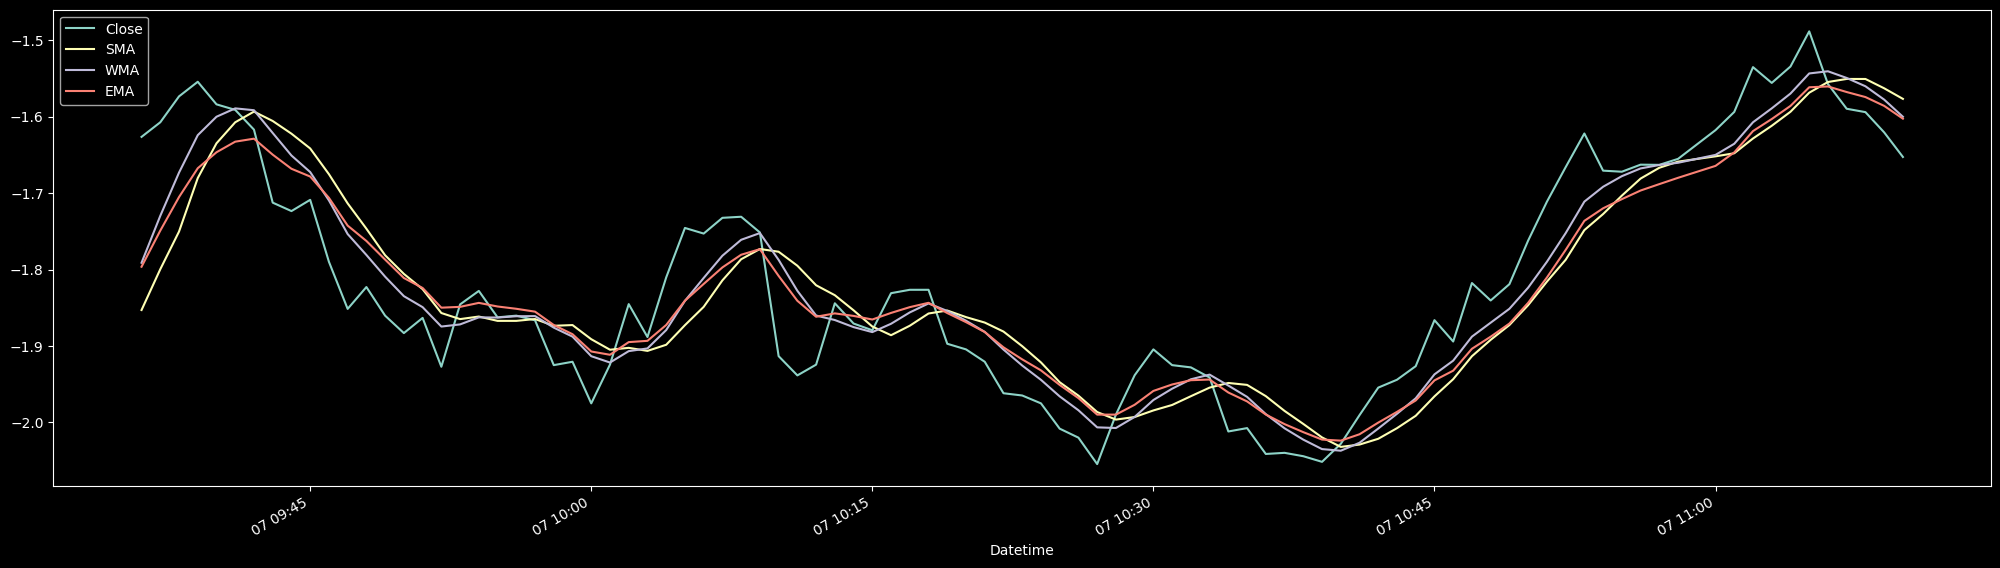

In [60]:
# https://www.analyticsvidhya.com/blog/2021/07/stock-prices-analysis-with-python/
plt.style.use('dark_background')
#data.reset_index(inplace=True)
data.Close[6:100].plot(label="Close", figsize=(25, 7))
data.SMA[6:100].plot(label="SMA")
data.WMA[6:100].plot(label="WMA")
data.EMA[6:100].plot(label="EMA")
plt.legend()
plt.show()

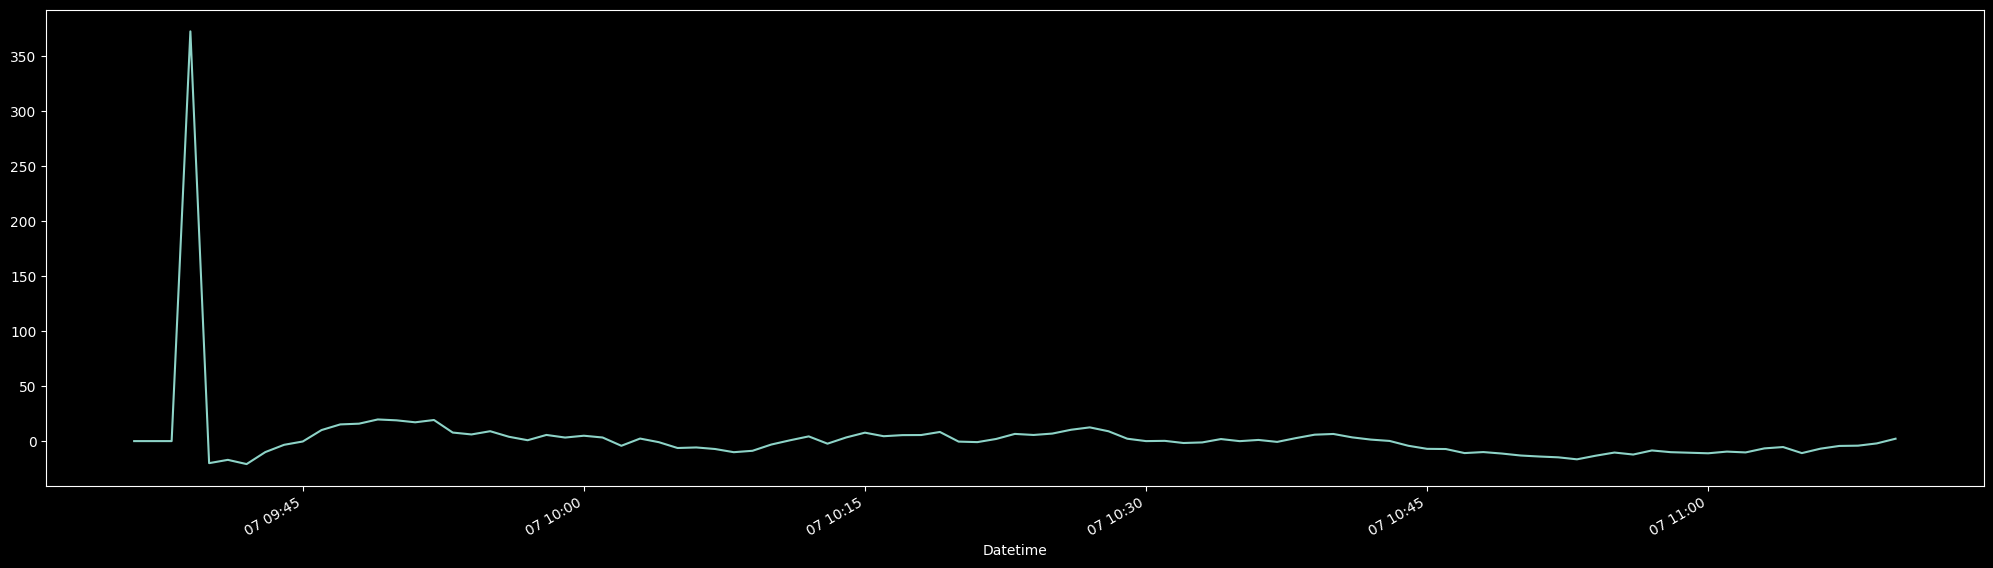

In [61]:
data.ROC[6:100].plot(label="ROC", figsize=(25, 7))
plt.show()

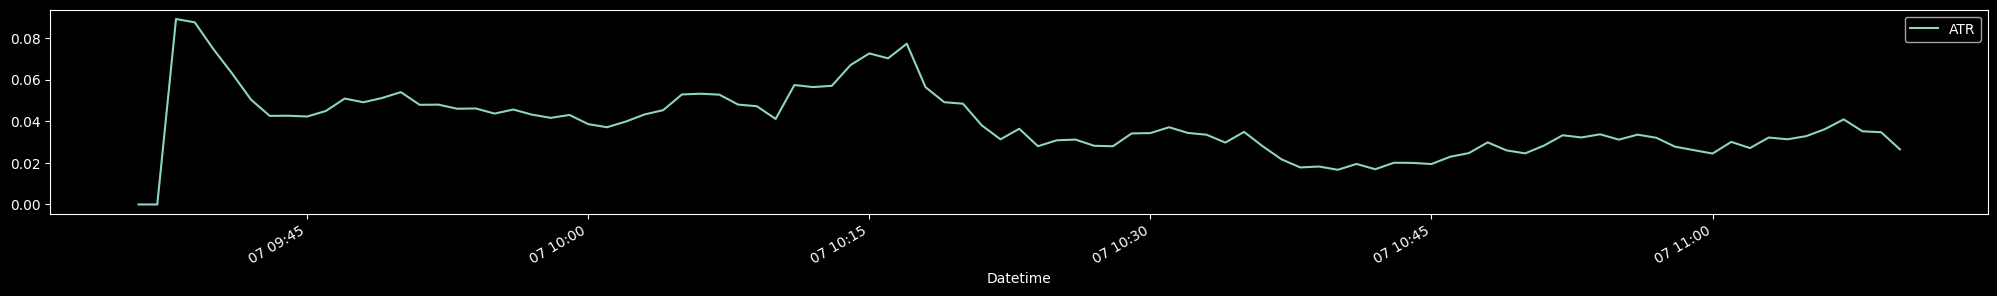

In [62]:

data.ATR[6:100].plot(label="ATR", figsize=(25, 3))
plt.legend()
plt.show()

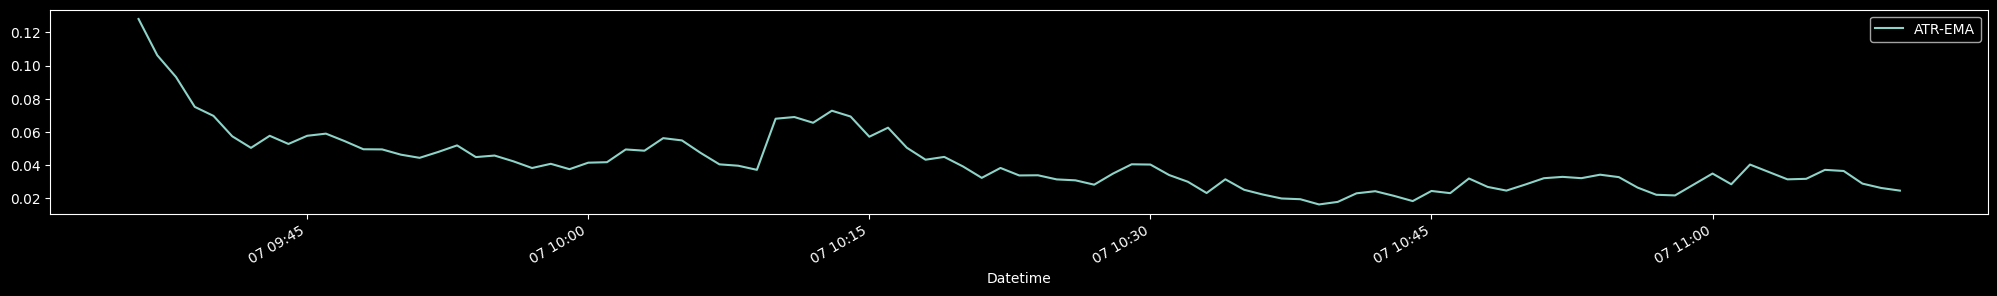

In [63]:

data.ATR_EMA[6:100].plot(label="ATR-EMA", figsize=(25, 3))
plt.legend()
plt.show()

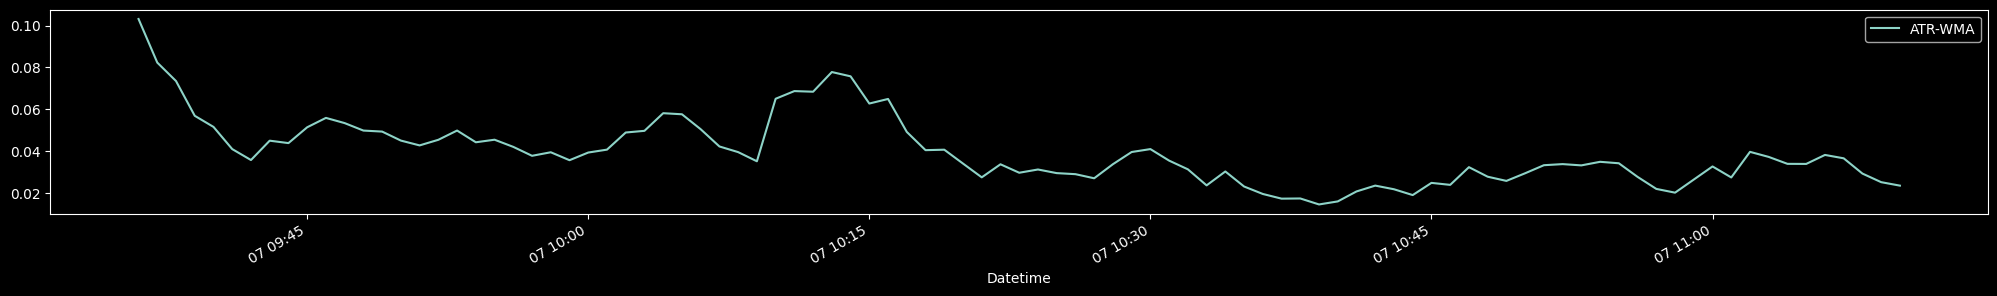

In [64]:

data.ATR_WMA[6:100].plot(label="ATR-WMA", figsize=(25, 3))
plt.legend()
plt.show()